In [13]:
from icoscp.cpb.dobj import Dobj
from pangaeapy import PanDataSet
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feat


# Loading the data from ICOS and PANGAEA into a dataframe

In [ ]:
icosdata = Dobj('https://meta.icos-cp.eu/objects/jY5fEGwtkCp-MkitR918Zzwk')
pandata = PanDataSet('10.1594/PANGAEA.814276')

icosdata_frame=icosdata.get()
pandata_frame=pandata.data

## Some parameter confusion - a case for IADOPT ;)

In [45]:
icosdata.colNames

0             Atmospheric Pressure [hPa]
1     Atmospheric Pressure [hPa] QC Flag
2                               Latitude
3                              Longitude
4                            P_sal [psu]
5                    P_sal [psu] QC Flag
6                              TIMESTAMP
7                            Temp [degC]
8                    Temp [degC] QC Flag
9                            fCO2 [uatm]
10                   fCO2 [uatm] QC Flag
11             fCO2 in atmosphere [uatm]
12     fCO2 in atmosphere [uatm] QC Flag
13                           pCO2 [uatm]
14                   pCO2 [uatm] QC Flag
15             pCO2 in atmosphere [uatm]
16     pCO2 in atmosphere [uatm] QC Flag
Name: colName, dtype: object

In [68]:
for p in pandata.params.values():
    print(str(p.name)+' ['+str(p.unit)+'] '+p.shortName)

DATE/TIME [None] Date/Time
LATITUDE [None] Latitude
LONGITUDE [None] Longitude
Distance [km] Distance
DEPTH, water [m] Depth water
Salinity [None] Sal
Temperature, water [°C] Temp
Temperature at equilibration [°C] Tequ
Pressure at equilibration [hPa] Pequ
Salinity, interpolated [None] Sal interp
Pressure, atmospheric, interpolated [hPa] PPPP interp
Depth, bathymetric, interpolated/gridded [m] Bathy depth interp/grid
xCO2 (air), interpolated [µmol/mol] xCO2air_interp
xCO2 (water) at equilibrator temperature (dry air) [µmol/mol] xCO2water_equ_dry
Fugacity of carbon dioxide (water) at equilibrator temperature (wet air) [µatm] fCO2water_equ_wet
Fugacity of carbon dioxide (water) at sea surface temperature (wet air) [µatm] fCO2water_SST_wet
Fugacity of carbon dioxide (water) at sea surface temperature (wet air) [µatm] fCO2water_SST_wet_2
Algorithm [None] Algorithm
Quality flag [#] Flag
Event [None] Event


### Comment:
Based on the parameter/column names we cannot be sure if e.g. given temperatures are measured in water or atmosphere.
Anyway, we use Temp [degC] (ICOS) and Temp (PANGAEA) for the plot..

# Plotting the tracks

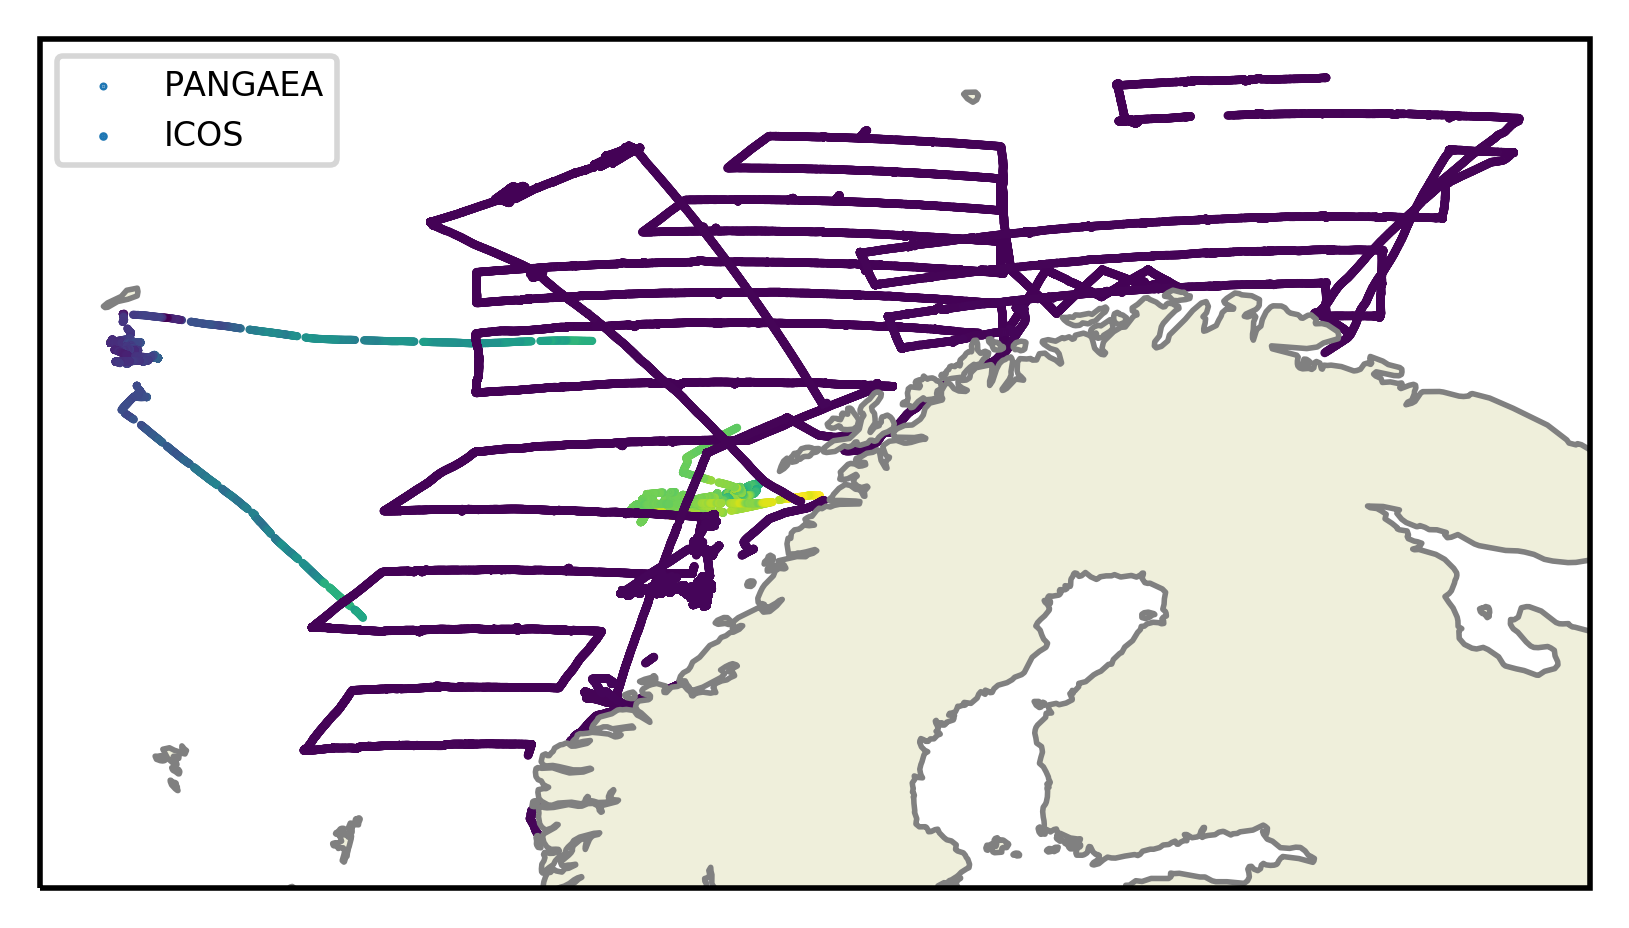

In [71]:
proj=ccrs.cartopy.crs.Miller()
plt.figure(figsize=(5,5),dpi=400)
ax = plt.axes(projection=proj)
land_50m = feat.NaturalEarthFeature('physical', 'land', '50m',edgecolor='grey',facecolor=feat.COLORS['land'])
ax.add_feature(land_50m)
#ax.coastlines()
ax.scatter(pandata_frame['Longitude'],pandata_frame['Latitude'],c=pandata_frame['Temp'],s=0.2,transform=ccrs.Geodetic(),label='PANGAEA')
ax.scatter(icosdata_frame['Longitude'],icosdata_frame['Latitude'],c=icosdata_frame['Temp [degC]'],s=0.3,transform=ccrs.Geodetic(),label='ICOS')
ax.legend(loc=2, prop={'size': 6})

# Citing the used data

In [44]:
for references in [pandata.citation, icosdata.citation]:
    print(references)
    print()

Johannessen, Truls; Lauvset, Siv K (2014): Underway physical oceanography and carbon dioxide measurements during G. O. Sars cruise 58GS20111003. Bjerknes Centre for Climate Research, PANGAEA, https://doi.org/10.1594/PANGAEA.814276, In supplement to: Bakker, Dorothee C E; Pfeil, Benjamin; Smith, Karl; Hankin, Steven; Olsen, Are; Alin, Simone R; Cosca, Catherine E; Harasawa, Sumiko; Kozyr, Alexander; Nojiri, Yukihiro; O'Brien, Kevin M; Schuster, Ute; Telszewski, Maciej; Tilbrook, Bronte; Wada, Chisato; Akl, John; Barbero, Leticia; Bates, Nicolas R; Boutin, Jacqueline; Bozec, Yann; Cai, Wei-Jun; Castle, Robert D; Chavez, Francisco P; Chen, Lei; Chierici, Melissa; Currie, Kim I; de Baar, Hein J W; Evans, Wiley; Feely, Richard A; Fransson, Agneta; Gao, Zhongyong; Hales, Burke; Hardman-Mountford, Nicolas J; Hoppema, Mario; Huang, Wei-Jen; Hunt, Christopher W; Huss, Betty; Ichikawa, Tadafumi; Johannessen, Truls; Jones, Elizabeth M; Jones, Steve D; Jutterstrøm, Sara; Kitidis, Vassilis; Körtzin